# DS2500 - Final Project: UEFA Champions League

Name: DK Lee

UID: u1326445

## 1. Question

Specific Question:

'Does a team’s performance of first half season lead them to the championship?'

The Reason:

Soccer has been a passion of mine for as long as I can remember. While many Americans may gravitate towards sports like the NFL, my heart belongs to soccer. Even after experiencing and enjoying various other sports since moving to the United States, soccer remains the most thrilling for me. As for my favorite team, I'm a die-hard supporter of Manchester United. Unfortunately, the retirement of Sir Alex Ferguson, the greatest manager in soccer history, has led to a bit of a rough patch for the club. When it comes to the UEFA Champions League (widely known as the UCL), I always feel a bit apprehensive during the group stage matches. For those unfamiliar, the UCL is an annual club association football competition organized by the Union of European Football Associations (UEFA) and pits the 32 top teams in Europe against each other to determine the best of the best. Making it through the group stage and into the round of 16 is vital for any soccer player or team hoping to achieve their dreams.

When I became interested in data science, I suddenly thought, "Does a team's performance of the first half season lead them to the championship?". As someone who dreams of analyzing soccer, I have many inquiries about the sport. This particular question holds significance for all UCL teams, as reaching the round of 16, and moreover winning the UCL are the lucrative achievements. With strict financial regulations in place, soccer clubs must generate a significant amount of revenue to invest in their team - a crucial aspect for their dedicated fans. The ability to accurately predict a team's success is crucial in preparing for the next season. In today's sports landscape, soccer has become highly analytical, and proficiency in handling this data allows for greater consistency within a team.

## 2. Data Set

- The data that I will use to answer the question are 'champions-league-(season).csv' and 'UCL_GS_DomesticLeague_(season).csv'. I will break the data down and explain it more in details.
- I will use the data from 17/18 season to 22/23 season (6 seasons).

### champions-league-(season).csv

This data is from 'https://fixturedownload.com/'.

This data is formed as .csv file so, I download and uploaded to my git hub account.

Columns
- Match Number: Unique assigned number to each match
- Round Number: Number of round for each match
- Date: When the match played
- Location: Where the match played
- Home Team: Home team(left side of the result)
- Away Team: Away team(right side of the result)
- Group: Group that both teams are in
- Result: Result of the game.

I'm going to use total 6 seasons of the UCL. So, below I will check one of them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

checking_UCL_match_data_url = 'https://raw.githubusercontent.com/DKunLee/DS2500_Final_Data/main/champions-league-2223.csv'
checking_UCL_match_data_df = pd.read_csv(checking_UCL_match_data_url)
checking_UCL_match_data_df.head(3)

,Match Number,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1,1,06/09/2022 16:45,Stadion Maksimir,Dinamo Zagreb,Chelsea,Group E,1 - 0
1,2,1,06/09/2022 16:45,BVB Stadion Dortmund,Dortmund,Copenhagen,Group G,3 - 0
2,3,1,06/09/2022 19:00,Stadion Salzburg,Salzburg,Milan,Group E,1 - 1


In [2]:
checking_UCL_match_data_df.tail(3)

,Match Number,Round Number,Date,Location,Home Team,Away Team,Group,Result
122,123,SF Game 2,16/05/2023 19:00,Stadio San Siro,Inter,Milan,NaN,1 - 0
123,124,SF Game 2,17/05/2023 19:00,City of Manchester Stadium,Man City,Real Madrid,NaN,4 - 0
124,125,Final,10/06/2023 19:00,Atatürk Olimpiyat Stadyumu,Man City,Inter,NaN,1 - 0


In [3]:
checking_UCL_match_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Match Number  125 non-null    int64 
 1   Round Number  125 non-null    object
 2   Date          125 non-null    object
 3   Location      125 non-null    object
 4   Home Team     125 non-null    object
 5   Away Team     125 non-null    object
 6   Group         96 non-null     object
 7   Result        125 non-null    object
dtypes: int64(1), object(7)
memory usage: 7.9+ KB


***There are no Null value in the data. (I will check it again later)***

### UCL_GS_DomesticLeague_(season).csv

I originally made this data only for this project. This data includes the data that I need for answering my question.

I get the data from the famous soccer statistic website called 'WhoScored'(https://www.whoscored.com/).

This data is formed as .csv file so, I download and uploaded to my git hub account.

Columns
- Team: Name of the team
- Played: Number of game played in the team's domestic league before Jan-1th of the season
- Goal Difference: Difference of the goal they scored and the goal conceded
- Points: league point that they earned (Win - 3pts, Draw - 1pts, Lose - 0pts)
- League Point: Ranking of the team's domestic league (Can think as how hard the league is among all the leagues in Europe)

I'm going to use total 6 seasons of the UCL. So, below I will check one of them.

In [4]:
checking_UCL_team_data_url = 'https://raw.githubusercontent.com/DKunLee/DS2500_Final_Data/main/UCL_GS_DomesticLeague_2223.csv'
checking_UCL_team_data_df = pd.read_csv(checking_UCL_team_data_url)
checking_UCL_team_data_df.head(3)

,Team,Played,Goal Difference,Points,League Point
0,Ajax,14,27,30,59.900
1,Atlético,15,9,27,92.998
2,Barcelona,15,28,38,92.998


In [5]:
checking_UCL_team_data_df.tail(3)

,Team,Played,Goal Difference,Points,League Point
29,Shakhtar Donetsk,13,18,30,29.500
30,Sporting CP,14,14,28,56.216
31,Tottenham,17,8,30,109.570


In [6]:
checking_UCL_team_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Team             32 non-null     object 
 1   Played           32 non-null     int64  
 2   Goal Difference  32 non-null     int64  
 3   Points           32 non-null     int64  
 4   League Point     32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


***There are no Null value in the data. (I will check it again later)***

### Why this data is appropriate?

I thought these were the right data to answer my question because they are the most important data in soccer. The round of 16 in the UCL usually starts in March, although the dates vary, and most European soccer leagues are halfway through their leagues as of January-1th, so a team's league and group stage performances up to January-1th are sufficiently representative of their first half performance. So we can extract the group stage results from 'champions-league-(season).csv', extract who the champions are and where each team's best finish is, and from 'UCL_GS_DomesticLeague_(season).csv' we'll get the goals against per game and points per month, and use the league's ranking.

***The ranking of the league is important because each league has a different difficulty level. This is because scoring a lot of points in an easy league versus scoring a lot of points in a hard league means that the overall weight of the team is different.***

## 3. Clean the data

### Import tools & Read data & Wrangle the data into one data

In [7]:
# For making the group stage points for each team based on result
def update_group_stage_points(gs_df, teams_df, season):
    for _, match in gs_df.iterrows():
        home_score, away_score = map(int, match['Result'].split(' - '))
        home_team, away_team = season + match['Home Team'], season + match['Away Team']
        if home_score > away_score:
            teams_df.loc[teams_df['Team'] == home_team, 'Group Stage Point'] += 3
        elif away_score > home_score:
            teams_df.loc[teams_df['Team'] == away_team, 'Group Stage Point'] += 3
        else:
            teams_df.loc[teams_df['Team'].isin([home_team, away_team]), 'Group Stage Point'] += 1

# Highest round that the team reached
def update_highest_round(tourn_df, teams_df, season):
    round_map = {'R16': '1', 'QF': '1', 'SF': '1', 'Final': '1'}
    for _, match in tourn_df.iterrows():
        round_key = match['Round Number'].split()[0]
        if round_key in round_map:
            teams_df.loc[teams_df['Team'].isin([season + match['Home Team'], season + match['Away Team']]), 'Made R16'] = round_map[round_key]

# Mark the champion as 1 for prediction
def update_champion(df, teams_df, season):
    final_match = df.iloc[-1]
    home_goals, away_goals = map(int, final_match['Result'].split(' - '))
    winner = final_match['Home Team'] if home_goals > away_goals else final_match['Away Team']
    teams_df.loc[teams_df['Team'] == season + winner, 'Champion'] = 1

# loading the data
def load_and_prepare_data(season, ucl_url, domestic_url):
    ucl_df = pd.read_csv(ucl_url)
    domestic_df = pd.read_csv(domestic_url)
    domestic_df['Team'] = season + domestic_df['Team'].astype(str)
    return ucl_df, domestic_df

# merge the wrangled data to final_df
def process_season(season, ucl_url, domestic_url):
    ucl_df, domestic_df = load_and_prepare_data(season, ucl_url, domestic_url)
    gs_df, tourn_df = ucl_df[ucl_df['Group'].notna()], ucl_df[ucl_df['Group'].isna()]
    list_of_teams = gs_df['Home Team'].unique()
    list_of_teams.sort()
    team_df = pd.DataFrame({'Team': season + list_of_teams, 'Group Stage Point': 0, 'Made R16': '0', 'Champion': 0})
    update_group_stage_points(gs_df, team_df, season)
    update_highest_round(tourn_df, team_df, season)
    team_df = pd.merge(team_df, domestic_df, on='Team', how='left')
    update_champion(ucl_df, team_df, season)
    return team_df

seasons = ['1718', '1819', '1920', '2021', '2122', '2223']
final_df = pd.DataFrame()

for season in seasons:
    UCL_URL = 'https://raw.githubusercontent.com/DKunLee/DS2500_Final_Data/main/champions-league-' + season + '.csv'
    UCL_Domestic_URL = 'https://raw.githubusercontent.com/DKunLee/DS2500_Final_Data/main/UCL_GS_DomesticLeague_' + season + '.csv'

    season_df = process_season(season, UCL_URL, UCL_Domestic_URL)
    final_df = pd.concat([final_df, season_df], ignore_index=True)

final_df = final_df[[col for col in final_df.columns if col != 'Champion'] + ['Champion']]

final_df = final_df.astype({col: float for col in ['Group Stage Point', 'Made R16', 'Played', 'Goal Difference', 'Points', 'League Point', 'Champion']})
final_df['Goal Difference'] = (final_df['Goal Difference'] / final_df['Played']).round(2)
final_df['Points'] = (final_df['Points'] / final_df['Played']).round(2)

### Check the top, bottom, and 'n's

In [8]:
final_df.head()

,Team,Group Stage Point,Made R16,Played,Goal Difference,Points,League Point,Champion
0,1718APOEL,2.0,0.0,15.0,1.53,2.20,21.550,0.0
1,1718Anderlecht,3.0,0.0,21.0,0.24,1.90,38.500,0.0
2,1718Atlético Madrid,7.0,0.0,17.0,1.00,2.12,106.998,0.0
3,1718Barcelona,14.0,1.0,17.0,2.24,2.65,106.998,0.0
4,1718Basel,12.0,1.0,19.0,1.21,2.00,30.200,0.0


In [9]:
final_df.tail()

,Team,Group Stage Point,Made R16,Played,Goal Difference,Points,League Point,Champion
187,2223Salzburg,6.0,0.0,16.0,1.50,2.44,34.000,0.0
188,2223Sevilla,5.0,0.0,15.0,-0.60,0.80,92.998,0.0
189,2223Shakhtar Donetsk,6.0,0.0,13.0,1.38,2.31,29.500,0.0
190,2223Sporting CP,7.0,0.0,14.0,1.00,2.00,56.216,0.0
191,2223Tottenham,11.0,1.0,17.0,0.47,1.76,109.570,0.0


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               192 non-null    object 
 1   Group Stage Point  192 non-null    float64
 2   Made R16           192 non-null    float64
 3   Played             192 non-null    float64
 4   Goal Difference    192 non-null    float64
 5   Points             192 non-null    float64
 6   League Point       192 non-null    float64
 7   Champion           192 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.1+ KB


***There are no Null value in the data. (I will check it again later)***

### Validate against an external data source

Checklist: Played, Points, Number of Champions
- Played: Each league is different, but most European leagues play between 36 and 38 games per season. It should be half that, 17 to 19 games.
- Points: Since it's points per game, they can't get more than 3 points.
- Number of Champions: Since there are 6 seasons, there should be 6 champions.

In [11]:
final_df.describe()

,Group Stage Point,Made R16,Played,Goal Difference,Points,League Point,Champion
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,8.359375,0.500000,17.140625,1.153177,2.089635,63.470208,0.031250
std,4.699450,0.501307,2.503613,0.751938,0.437292,26.936070,0.174448
min,0.000000,0.000000,11.000000,-0.720000,0.720000,11.250000,0.000000
25%,4.000000,0.000000,15.000000,0.575000,1.775000,37.900000,0.000000
50%,8.000000,0.500000,17.000000,1.150000,2.110000,70.653000,0.000000
75%,12.000000,1.000000,19.000000,1.670000,2.440000,82.481000,0.000000
max,18.000000,1.000000,30.000000,3.060000,2.890000,109.570000,1.000000


Looking at the table, it seems that most teams are satisfied with the number of matches. There are outliers, but the data is still reliable. Also, the maximum game point is no more than 3 points.

In [12]:
champion_count = final_df[final_df['Champion'] == 1].shape[0]

print("Number of champions from the data are " + str(champion_count))

Number of champions from the data are 6


### Final data

Column:
- Team: Name of the team
- Group Stage Point: Points that the team earned
- Made R16: Whether the team made the round of 16 or not (1: succeed, 0: failed)
- Played: Number of game played in the team's domestic league before Jan-1th of the season
- GD by league ranking: Difference of the goal they scored and the goal conceded depends on the team's league ranking
- Points by league ranking: league point that they earned (Win - 3pts, Draw - 1pts, Lose - 0pts) depends on the team's league ranking
- League Point: Ranking of the team's domestic league (Can think as how hard the league is among all the leagues in Europe)
- Champion: If it's 1, it means they win the UCL. If it's 0, it means they didn't win the UCL

In [13]:
final_df['Goal Difference'] = (final_df['Goal Difference'] * (final_df['League Point'] / 50)).round(2)
final_df['Points'] = (final_df['Points'] * (final_df['League Point'] / 50)).round(2)

final_df.rename(columns={'Goal Difference': 'GD by league ranking', 'Points': 'Points by league ranking'}, inplace=True)

final_df.head()

,Team,Group Stage Point,Made R16,Played,GD by league ranking,Points by league ranking,League Point,Champion
0,1718APOEL,2.0,0.0,15.0,0.66,0.95,21.550,0.0
1,1718Anderlecht,3.0,0.0,21.0,0.18,1.46,38.500,0.0
2,1718Atlético Madrid,7.0,0.0,17.0,2.14,4.54,106.998,0.0
3,1718Barcelona,14.0,1.0,17.0,4.79,5.67,106.998,0.0
4,1718Basel,12.0,1.0,19.0,0.73,1.21,30.200,0.0


## 4. Outputs(Visualization, tables, test)

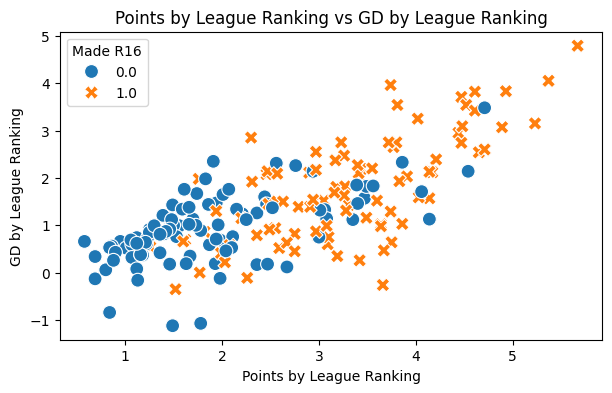

In [14]:
plt.figure(figsize = (7, 4))
sns.scatterplot(x = 'Points by league ranking', y = 'GD by league ranking', hue = 'Made R16', style = 'Made R16', s = 100, data = final_df)
plt.title('Points by League Ranking vs GD by League Ranking')
plt.xlabel('Points by League Ranking')
plt.ylabel('GD by League Ranking')
plt.legend(title = 'Made R16')
plt.show()

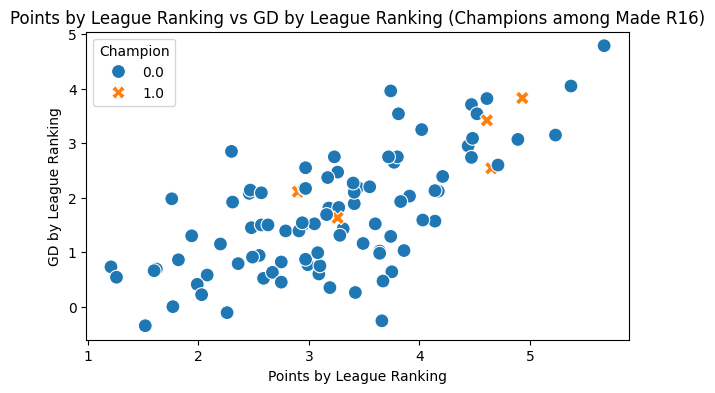

In [15]:
df_r16 = final_df[final_df['Made R16'] == 1]

plt.figure(figsize = (7, 4))
sns.scatterplot(x = 'Points by league ranking', y = 'GD by league ranking', hue = 'Champion', style = 'Champion', s = 100, data = df_r16)
plt.title('Points by League Ranking vs GD by League Ranking (Champions among Made R16)')
plt.xlabel('Points by League Ranking')
plt.ylabel('GD by League Ranking')
plt.legend(title = 'Champion')
plt.show()

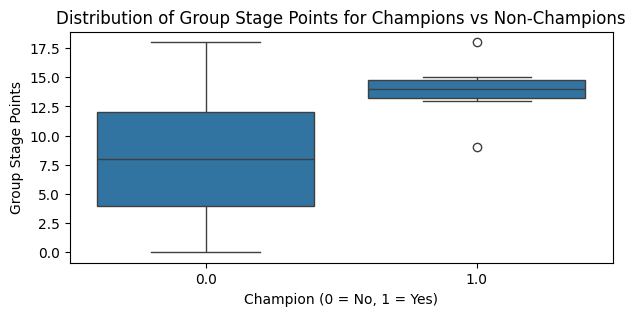

In [16]:
plt.figure(figsize=(7, 3))

sns.boxplot(x = 'Champion', y = 'Group Stage Point', data = final_df)
plt.title('Distribution of Group Stage Points for Champions vs Non-Champions')
plt.xlabel('Champion (0 = No, 1 = Yes)')
plt.ylabel('Group Stage Points')
plt.show()

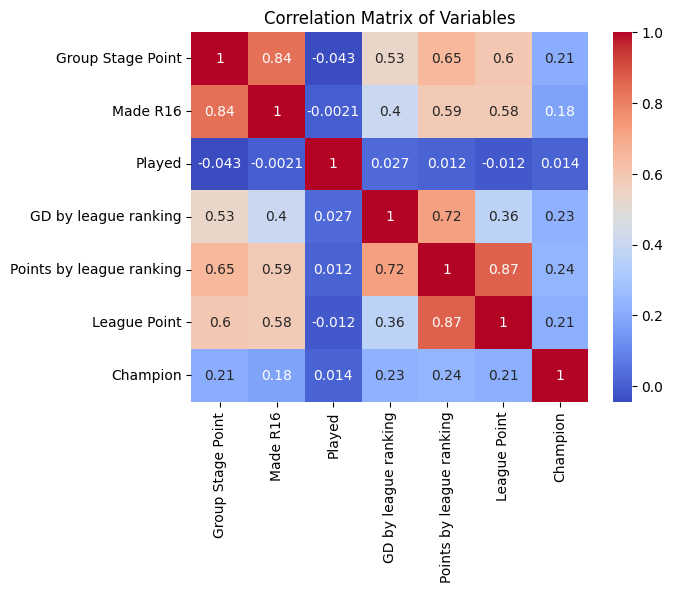

In [17]:
correlation_matrix = final_df[['Group Stage Point', 'Made R16', 'Played', 'GD by league ranking', 'Points by league ranking', 'League Point', 'Champion']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

- ***Group Stage Points***: The correlation of 0.21 with the Champion variable indicates a positive but relatively modest relationship. Teams scoring higher in the group stage exhibit a slightly increased likelihood of winning the championship, but this factor alone is not a strong predictor of final success.
- ***Made R16***: The correlation coefficient of 0.18 with becoming the champion suggests a positive relationship, albeit slightly weaker than that observed for group stage points. However, it's important to note that advancing to the Round of 16 positively influences the chances of winning the championship, even if this influence is relatively weak.
- Played: Contrary to common belief, the number of games played in the domestic league before January 1st, as indicated by a very low correlation of 0.014, has a negligible association with the likelihood of winning the UEFA Champions League. This suggests that the number of domestic games played up to this point **is not a reliable predictor of UCL success**, challenging a commonly held belief in football analytics.
- ***GD by League Ranking***: A correlation of 0.23 suggests a modestly positive relationship. A superior goal difference relative to league ranking is marginally more indicative of potential UCL success than simple group stage performance or advancing to the Round of 16.
- ***Points by League Ranking***: The correlation of 0.24 indicates a slightly stronger but still modest relationship compared to goal difference by league ranking. Teams that outperform relative to their league's average have a somewhat better chance of success in the UCL, suggesting that relative league performance might be a slightly more effective predictor of UCL success.
- ***League Points***: The correlation of 0.21, which mirrors that of group stage points, indicates that the competitiveness or strength of a team’s domestic league correlates similarly with the chances of becoming UCL champion, as does their performance in the group stages.

Since I have more than two groups (Champion and Non-Champion), ANOVA is a better choice than a t-test.

In [18]:
champions = final_df[final_df['Champion'] == 1]['Points by league ranking']
non_champions = final_df[final_df['Champion'] == 0]['Points by league ranking']

t_statistic, p_value = stats.ttest_ind(champions, non_champions)

print("T-test results:")
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("We can reject the null hypothesis that there is no significant difference in Points by league ranking between champions and non-champions.")
else:
    print("We fail to reject the null hypothesis. There might not be a significant difference in Points by league ranking between champions and non-champions.")

T-test results:
t-statistic: 3.34
p-value: 0.0010
We can reject the null hypothesis that there is no significant difference in Points by league ranking between champions and non-champions.


In [19]:
champions = final_df[final_df['Champion'] == 1]['Group Stage Point']
non_champions = final_df[final_df['Champion'] == 0]['Group Stage Point']

t_statistic, p_value = stats.ttest_ind(champions, non_champions)

print("T-test results:")
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("We can reject the null hypothesis that there is no significant difference in Group Stage Point between champions and non-champions.")
else:
    print("We fail to reject the null hypothesis. There might not be a significant difference in Group Stage Point between champions and non-champions.")

T-test results:
t-statistic: 2.96
p-value: 0.0035
We can reject the null hypothesis that there is no significant difference in Group Stage Point between champions and non-champions.


We can reject both null hypotheses that there are no significant differences in points by league ranking and group stage points between champions and non-champions at a significance level of alpha = 0.05. This means that the points by league ranking and the group stage points are statistically different between champions and non-champions. However, the t-test we conducted earlier showed that the difference is not statistically significant.
**This may be due to the fact that we have a small sample size or that the variances of the two groups are unequal.**

## 5. Conclusion


### A. Answer(revisit hook and thesis, emphasize again why this matters)

**First-half performance doesn't guarantee UCL a win.**

#### *Details

First-half performance doesn't guarantee UCL a win. However, as you can see from the graphs and tests above, there is some correlation. In the data I processed, I found that "Played" was not correlated at all. However, the rest ('Group Stage Point', 'GD by league ranking', 'Points by league ranking', and 'League Point') show a very slight correlation. This suggests that while first-half performance may not be a definitive predictor of UCL success, it does have some influence.

The reason they show some correlation is speculative. There is an assumption that teams that perform well in the first half will perform well in the second half. However, sports, especially soccer, is a realm of unpredictability. It's the unexpected twists and turns, the underdogs defying the odds, that make sports so thrilling. So, perhaps, it's more intriguing to question the high correlation we expect. This analysis offers a unique perspective on the relationship between first-half performance and UCL success, challenging conventional wisdom and sparking further discussion.

However, if you look at the "Points by League Ranking VS GD by League Ranking (Champions among Made R16)" graph, the winning teams are rarely in the bottom left corner. This graph shows that you need to perform better than the rest of the teams on average in the first half of the season to have a chance of winning the UCL. This finding suggests that a strong first-half performance is a significant factor in UCL success, but it's not the only one. Other factors, such as team strategy and player performance, also play a crucial role.

### B. Limitation
 - Data
  - In terms of data, my data could have been more sparse, but that's to be expected given the nature of the UCL competition and soccer as a sport, which is played once a year. I was also limited in terms of accessibility as most of the data is either unavailable for scraping from the web or you have to pay money for it. Nevertheless, it was encouraging to see that I could use a lot of raw data to generate new data for analysis.

 - Analysis approach (limitations & weaknesses)
  - This was tied to the limitations of data accessibility. My original plan was to create a simple UCL winner prediction model with only the columns I had analyzed and found meaningful, but there was a fatal error. Out of 192 data points, only six teams won UCL, which was insufficient data to train the model. As a result, the model predicted 0 (no UCL winner) for most tests, with an accuracy score of nearly 100%. This is a fundamental model training error and is an unusable result(because simply labeling all tests as 0 would have yielded similar results).

    Furthermore, the data was less correlated than I thought, so getting a highly significant test result was impossible.

### C. Potential counterarguments
  - First, as I noted, the limited sample size and the skewed distribution of championship winners pose significant challenges to model accuracy. Critics might argue that different insights could emerge with more comprehensive data or a different modeling approach, such as a machine learning algorithm that can better handle class imbalance.
  - Second, if you use more detailed metrics, you will find significant correlations. The data I used is very basic, and I analyzed it based on team wins and losses and the difficulty of the league. Of course, team wins and losses have a lot to do with a team's progression in the tournament, but as modern soccer has become so complex and sophisticated, there are many other factors that affect a team's performance. I would have found more significant correlations if I had used more detailed soccer metrics.